Fashion MNIST: tf.keras.datasets.fashion_mnist.load_data()

CIFAR-10: tf.keras.datasets.cifar10.load_data()

In [ ]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# The below imports are just for convenience so typing it all out can be skipped
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [ ]:
# The data is only 2D
# Convolution expects heigh x width x colour
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28, 1)


In [ ]:
# Number of classes
K = len(set(y_train))
print("Number of classes:", K)

Number of classes: 10


In [ ]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation="relu")(i)
x = Conv2D(64, (3, 3), strides=2, activation="relu")(x)
x = Conv2D(128, (3, 3), strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)

model = Model(i, x)

In [ ]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(
  optimizer="adam",
  loss="sparse_categorical_crossentropy",
  metrics=["accuracy"]
)
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5192 - accuracy: 0.8084 - val_loss: 0.4035 - val_accuracy: 0.8509
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3574 - accuracy: 0.8652 - val_loss: 0.3539 - val_accuracy: 0.8716
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3091 - accuracy: 0.8828 - val_loss: 0.3210 - val_accuracy: 0.8848
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2763 - accuracy: 0.8954 - val_loss: 0.2980 - val_accuracy: 0.8864
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2510 - accuracy: 0.9056 - val_loss: 0.2949 - val_accuracy: 0.8923
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2310 - accuracy: 0.9130 - val_loss: 0.2785 - val_accuracy: 0.9005
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2123 - accuracy: 0.9181 - val_loss: 0.2941 - val_ac

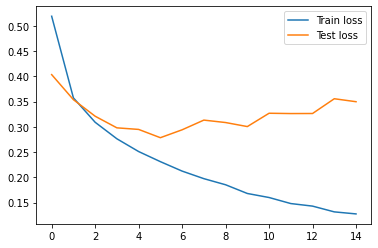

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='Train loss')
plt.plot(r.history['val_loss'], label='Test loss')
plt.legend()

In [ ]:
# Plot loss per iteration
plt.plot(r.history['acc'], label='Train loss')
plt.plot(r.history['val_acc'], label='Validation loss')
plt.legend()

KeyError: ignored

Confusion matrix, without normalization
[[878   2  20  16   3   2  72   0   7   0]
 [  1 978   1  14   2   0   3   0   1   0]
 [ 18   1 852  11  52   0  64   0   2   0]
 [ 16   6  15 910  23   0  30   0   0   0]
 [  3   0  54  26 814   0 103   0   0   0]
 [  0   0   0   1   0 972   0  19   0   8]
 [123   1  71  21  52   1 719   0  12   0]
 [  0   0   0   0   0  10   0 980   0  10]
 [  4   1   2   2   4   1   6   3 976   1]
 [  1   0   0   0   0   4   0  47   0 948]]


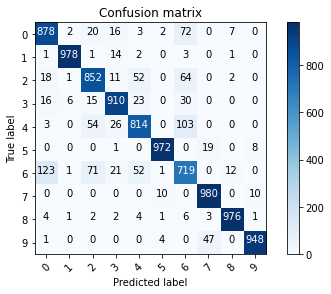

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

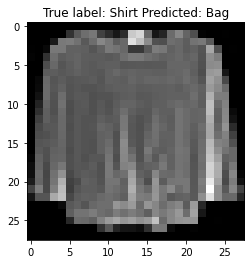

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

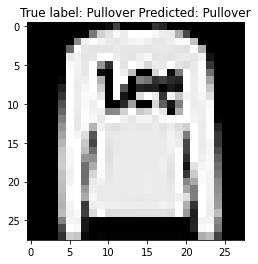

In [ ]:
# Show some random examples
random_idx = p_test[0]
i = np.random.choice(random_idx)
plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));